# Clustering

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import umap

from sklearn.cluster import KMeans

## UMAP

Starting off with the UMAP so we get a general idea of what the raw dimensionally reduced data looks like.

In [2]:
# Read the data
data = pd.read_csv("/data/processed/tabular/cells_znorm.csv", index_col=0)
data

,nuc_area,major_axis_length,minor_axis_length,R0_DNA_nuc_mean,R0_Rb_nuc_mean,R0_pRb_nuc_mean,R1_Jak2_nuc_mean,R1_p16_nuc_mean,R1_p21_nuc_mean,R2_pp65_nuc_mean,...,R2_pp65_ratio,R5_p38_ratio,R4_IL8_ratio,R2_IL6_ratio,R7_GATA4_ratio,R1_Jak2_ratio,R5_STAT5_ratio,R6_pSTAT3_ratio,R0_DNA_ratio,R6_p65_ratio
cell_id,,,,,,,,,,,,,,,,,,,,,
0,-0.546994,-0.493334,-0.681994,0.667074,1.298778,1.624972,-0.150356,-0.199530,-0.169155,-2.773496,...,-2.635749,-0.619520,-2.738118,-1.722938,-0.338607,0.423588,-1.083958,-0.801436,1.265292,-0.662569
1,-0.323159,-0.308146,-0.174474,0.816020,-0.229840,-0.005965,0.709733,1.535745,0.553059,-2.817436,...,-3.597155,0.691768,-3.753504,-2.329228,1.288944,0.723020,-0.002473,0.398600,-0.013980,0.246413
2,-0.541081,-0.569417,-0.568636,0.954040,0.945282,1.377804,-0.049996,0.465476,0.189116,-1.733097,...,1.031003,2.409424,-0.511297,1.467053,1.877327,0.833991,1.563194,2.879394,0.271425,2.479250
3,-0.548683,-0.631633,-0.541236,0.178993,0.624143,1.203663,0.523914,1.489560,1.316873,-1.608887,...,-0.446680,-1.389495,-4.742786,-0.326860,-1.986473,1.336529,-1.820685,-1.524161,0.020646,-0.967635
4,-0.685518,-0.979479,-0.649257,-0.353034,0.906413,1.018319,-0.145686,0.093259,0.378025,-0.971085,...,2.011546,2.553093,-0.870393,1.563721,2.580293,0.064117,1.566852,0.858859,0.567526,0.469224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42779,-0.181256,-0.353451,0.336684,-1.602811,-0.818319,-0.593664,0.654362,0.162487,-0.384943,0.102613,...,-0.702765,-0.463604,-1.036810,-0.652425,-0.380974,-0.095733,-0.222833,0.119292,-1.231786,0.209638
42780,-0.828266,-0.744143,-1.409236,-1.713189,-0.997621,-0.454068,0.154792,-0.009827,1.505253,-0.394022,...,0.703526,-0.480046,1.016190,2.754542,0.608078,0.895856,0.022150,1.342921,-1.290853,1.576594
42781,0.207288,0.520338,0.368319,-0.831937,-0.771178,-0.521593,-0.405636,-0.527002,-0.487242,-1.151271,...,-0.648533,-1.378993,-2.871388,-0.768469,-0.668203,-1.337612,-1.616837,-1.323531,-1.535826,-0.853907


Now perform UMAP:

In [33]:
reducer = umap.UMAP()

umap_data = data.values

embedding = reducer.fit_transform(umap_data)
embedding

array([[10.253751 ,  8.293339 ],
       [10.35256  ,  7.853196 ],
       [ 5.688931 , 10.421254 ],
       ...,
       [ 1.2098143,  4.5876584],
       [ 3.6871367,  1.6078504],
       [10.2257185,  8.731986 ]], dtype=float32)

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

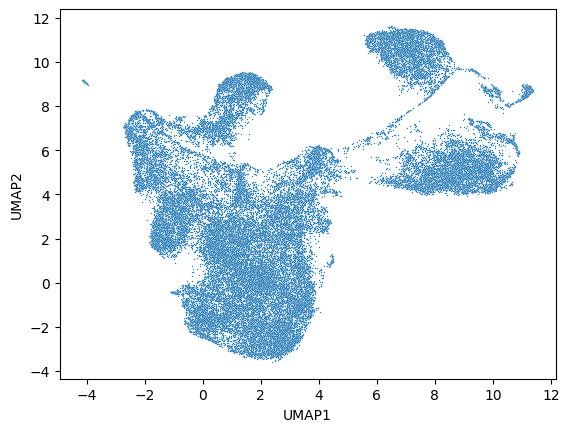

In [37]:
embedding_cp = pd.DataFrame({
    "cell_id": data.index,
    "UMAP1": embedding[:, 0],
    "UMAP2": embedding[:, 1]})

embedding_cp.set_index("cell_id")

# Load timepoint associations
treatment_map = pd.read_csv("/data/metadata/treatment_mapping.csv", index_col=0)
cell_meta = pd.read_csv("/data/metadata/cells_metadata.csv", index_col=0)

cell_meta = cell_meta.reset_index().merge(treatment_map, how="left", on="treatment_id").set_index("cell_id")

embedding_final = embedding_cp.merge(cell_meta, how='left', left_index=True, right_index=True)

sns.scatterplot(data=embedding_final, x='UMAP1', y='UMAP2', s=1)

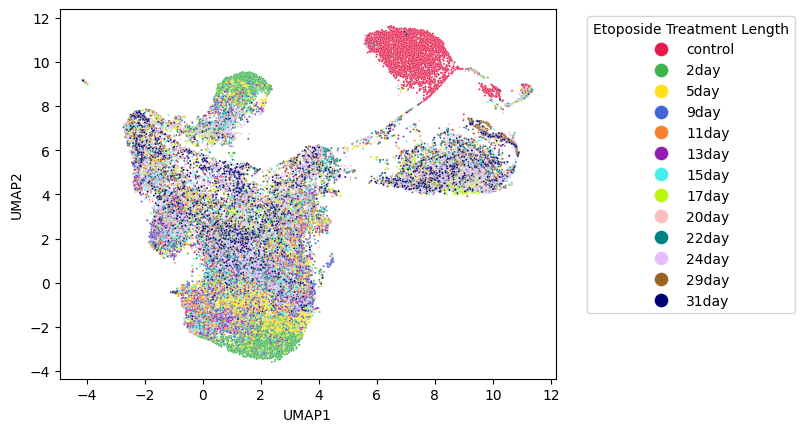

In [42]:
# Color by treatment

treatment_palette = [
    '#e6194b',  # strong red
    '#3cb44b',  # vivid green
    '#ffe119',  # bright yellow
    '#4363d8',  # strong blue
    '#f58231',  # orange
    '#911eb4',  # purple
    '#46f0f0',  # cyan
    '#bcf60c',  # lime
    '#fabebe',  # pink
    '#008080',  # teal
    '#e6beff',  # lavender
    '#9a6324',  # brown
    '#000075'   # navy 
]

sns.scatterplot(data=embedding_final, x='UMAP1', y='UMAP2', hue='treatment', palette=treatment_palette, s=2)
plt.legend(title="Etoposide Treatment Length", loc="upper left", markerscale=7,
           bbox_to_anchor=(1.05,1))

## KMeans Clustering

### Elbow Plot

In [31]:
nclust = range(2,30)
interias = []

kmeans_results = pd.DataFrame(index=data.index)

for i in nclust:
    kmeans = KMeans(n_clusters=i, random_state=416, n_init=10)
    kmeans.fit(data)
    
    # Store inertia for elbow plot
    interias.append(kmeans.inertia_)
    
    # Add cluster labels as a new col
    kmeans_results[f'kmeans_{i}clust'] = kmeans.labels_


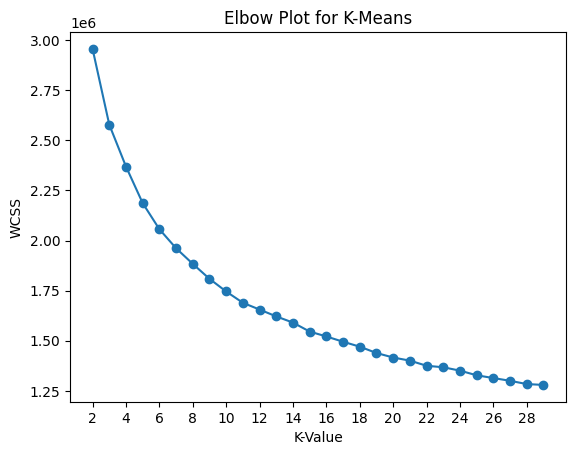

In [32]:
plt.plot(nclust, interias, marker='o')
plt.title('Elbow Plot for K-Means')
plt.xticks(np.arange(2, 30, 2))
plt.xlabel('K-Value')
plt.ylabel('WCSS')
plt.show()

So K-Means does not look like it's the best method of clustering available for this dataset. 